In [1]:
from model import get_model
from train_helper import BN_Trainer, Trainer, get_misclassified_images
# from trainer import Trainer
from __future__ import print_function
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
import numpy as np
from torchsummary import summary
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Train Phase transformations
train_transforms = transforms.Compose([
                                      #  transforms.Resize((28, 28)),
                                      #  transforms.ColorJitter(brightness=0.10, contrast=0.1, saturation=0.10, hue=0.1),
                                       transforms.RandomRotation((-7.0, 7.0), fill=(1,)),
                                       transforms.ToTensor(),
                                       transforms.Normalize((0.1307,), (0.3081,)) # The mean and std have to be sequences (e.g., tuples), therefore you should add a comma after the values. 
                                       # Note the difference between (0.1307) and (0.1307,)
                                       ])

# Test Phase transformations
test_transforms = transforms.Compose([
                                      #  transforms.Resize((28, 28)),
                                      #  transforms.ColorJitter(brightness=0.10, contrast=0.1, saturation=0.10, hue=0.1),
                                       transforms.ToTensor(),
                                       transforms.Normalize((0.1307,), (0.3081,))
                                       ])


In [3]:
train = datasets.MNIST('./data', train=True, download=True, transform=train_transforms)
test = datasets.MNIST('./data', train=False, download=True, transform=test_transforms)

In [4]:
SEED = 1

# CUDA?
cuda = torch.cuda.is_available()
print("CUDA Available?", cuda)

# For reproducibility
torch.manual_seed(SEED)

if cuda:
    torch.cuda.manual_seed(SEED)

# dataloader arguments - something you'll fetch these from cmdprmt
dataloader_args = dict(shuffle=True, batch_size=128, num_workers=4, pin_memory=True) if cuda else dict(shuffle=True, batch_size=64)

# train dataloader
train_loader = torch.utils.data.DataLoader(train, **dataloader_args)

# test dataloader
test_loader = torch.utils.data.DataLoader(test, **dataloader_args)

CUDA Available? True


In [5]:
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
print(device)
# model = BatchNormCNN().to(device)
# summary(model, input_size=(1, 28, 28))

cuda


In [7]:
model_bn = get_model("BN").to(device)
summary(model_bn, input_size=(1, 28, 28))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 16, 26, 26]             144
              ReLU-2           [-1, 16, 26, 26]               0
       BatchNorm2d-3           [-1, 16, 26, 26]              32
           Dropout-4           [-1, 16, 26, 26]               0
            Conv2d-5           [-1, 16, 24, 24]           2,304
              ReLU-6           [-1, 16, 24, 24]               0
       BatchNorm2d-7           [-1, 16, 24, 24]              32
           Dropout-8           [-1, 16, 24, 24]               0
            Conv2d-9           [-1, 10, 24, 24]             160
        MaxPool2d-10           [-1, 10, 12, 12]               0
           Conv2d-11           [-1, 16, 10, 10]           1,440
             ReLU-12           [-1, 16, 10, 10]               0
      BatchNorm2d-13           [-1, 16, 10, 10]              32
          Dropout-14           [-1, 16,

In [8]:
bn_trainer = BN_Trainer(model_bn)

In [23]:
from torch.optim.lr_scheduler import StepLR, LambdaLR

optimizer = optim.SGD(model_bn.parameters(), lr=0.01, momentum=0.9)
# scheduler = StepLR(optimizer, step_size=4, gamma=0.1)
scheduler = torch.optim.lr_scheduler.MultiStepLR(optimizer, milestones=[6,8,9], gamma=0.1)

EPOCHS = 20
for epoch in range(EPOCHS):
    print("EPOCH:", epoch)
    bn_trainer.train_bn(device, train_loader, optimizer, epoch)
    bn_trainer.test_bn(device, test_loader)

EPOCH: 0


Loss=0.2190942019224167 Batch_id=468 Accuracy=82.61: 100%|███████████████████████████| 469/469 [00:07<00:00, 58.66it/s]



Test set: Average loss: 0.2219, Accuracy: 9728/10000 (97.28%)

EPOCH: 1


Loss=0.17482571303844452 Batch_id=468 Accuracy=96.89: 100%|██████████████████████████| 469/469 [00:07<00:00, 60.03it/s]



Test set: Average loss: 0.1002, Accuracy: 9857/10000 (98.57%)

EPOCH: 2


Loss=0.09602281451225281 Batch_id=468 Accuracy=97.67: 100%|██████████████████████████| 469/469 [00:08<00:00, 55.06it/s]



Test set: Average loss: 0.0834, Accuracy: 9883/10000 (98.83%)

EPOCH: 3


Loss=0.05423324555158615 Batch_id=468 Accuracy=98.00: 100%|██████████████████████████| 469/469 [00:08<00:00, 58.62it/s]



Test set: Average loss: 0.0749, Accuracy: 9875/10000 (98.75%)

EPOCH: 4


Loss=0.07752001285552979 Batch_id=468 Accuracy=98.10: 100%|██████████████████████████| 469/469 [00:08<00:00, 57.22it/s]



Test set: Average loss: 0.0617, Accuracy: 9902/10000 (99.02%)

EPOCH: 5


Loss=0.09823071956634521 Batch_id=468 Accuracy=98.41: 100%|██████████████████████████| 469/469 [00:07<00:00, 59.36it/s]



Test set: Average loss: 0.0670, Accuracy: 9894/10000 (98.94%)

EPOCH: 6


Loss=0.027930181473493576 Batch_id=468 Accuracy=98.45: 100%|█████████████████████████| 469/469 [00:07<00:00, 59.96it/s]



Test set: Average loss: 0.0524, Accuracy: 9909/10000 (99.09%)

EPOCH: 7


Loss=0.010220135562121868 Batch_id=468 Accuracy=98.50: 100%|█████████████████████████| 469/469 [00:07<00:00, 60.20it/s]



Test set: Average loss: 0.0632, Accuracy: 9903/10000 (99.03%)

EPOCH: 8


Loss=0.023928262293338776 Batch_id=468 Accuracy=98.64: 100%|█████████████████████████| 469/469 [00:07<00:00, 61.09it/s]



Test set: Average loss: 0.0657, Accuracy: 9910/10000 (99.10%)

EPOCH: 9


Loss=0.01305002998560667 Batch_id=468 Accuracy=98.64: 100%|██████████████████████████| 469/469 [00:07<00:00, 58.93it/s]



Test set: Average loss: 0.0501, Accuracy: 9923/10000 (99.23%)

EPOCH: 10


Loss=0.05552012473344803 Batch_id=468 Accuracy=98.70: 100%|██████████████████████████| 469/469 [00:07<00:00, 58.78it/s]



Test set: Average loss: 0.0559, Accuracy: 9932/10000 (99.32%)

EPOCH: 11


Loss=0.08225151896476746 Batch_id=468 Accuracy=98.74: 100%|██████████████████████████| 469/469 [00:07<00:00, 59.77it/s]



Test set: Average loss: 0.0487, Accuracy: 9916/10000 (99.16%)

EPOCH: 12


Loss=0.04363783821463585 Batch_id=468 Accuracy=98.80: 100%|██████████████████████████| 469/469 [00:07<00:00, 59.50it/s]



Test set: Average loss: 0.0415, Accuracy: 9934/10000 (99.34%)

EPOCH: 13


Loss=0.005561237223446369 Batch_id=468 Accuracy=98.86: 100%|█████████████████████████| 469/469 [00:07<00:00, 61.19it/s]



Test set: Average loss: 0.0421, Accuracy: 9919/10000 (99.19%)

EPOCH: 14


Loss=0.0590495765209198 Batch_id=468 Accuracy=98.86: 100%|███████████████████████████| 469/469 [00:08<00:00, 56.54it/s]



Test set: Average loss: 0.0411, Accuracy: 9926/10000 (99.26%)

EPOCH: 15


Loss=0.012788147665560246 Batch_id=468 Accuracy=98.92: 100%|█████████████████████████| 469/469 [00:07<00:00, 59.27it/s]



Test set: Average loss: 0.0502, Accuracy: 9920/10000 (99.20%)

EPOCH: 16


Loss=0.0103422487154603 Batch_id=468 Accuracy=98.86: 100%|███████████████████████████| 469/469 [00:08<00:00, 57.22it/s]



Test set: Average loss: 0.0339, Accuracy: 9932/10000 (99.32%)

EPOCH: 17


Loss=0.10387954860925674 Batch_id=468 Accuracy=98.90: 100%|██████████████████████████| 469/469 [00:07<00:00, 61.12it/s]



Test set: Average loss: 0.0391, Accuracy: 9934/10000 (99.34%)

EPOCH: 18


Loss=0.018786810338497162 Batch_id=468 Accuracy=98.95: 100%|█████████████████████████| 469/469 [00:07<00:00, 61.18it/s]



Test set: Average loss: 0.0365, Accuracy: 9937/10000 (99.37%)

EPOCH: 19


Loss=0.10289197415113449 Batch_id=468 Accuracy=98.90: 100%|██████████████████████████| 469/469 [00:07<00:00, 64.02it/s]



Test set: Average loss: 0.0378, Accuracy: 9932/10000 (99.32%)



In [26]:
bn_train_losses, bn_train_acc, bn_test_losses, bn_test_acc = bn_trainer.get_stats()

In [9]:
bn_misclassified_preds = get_misclassified_images(model_bn, device, test_loader)

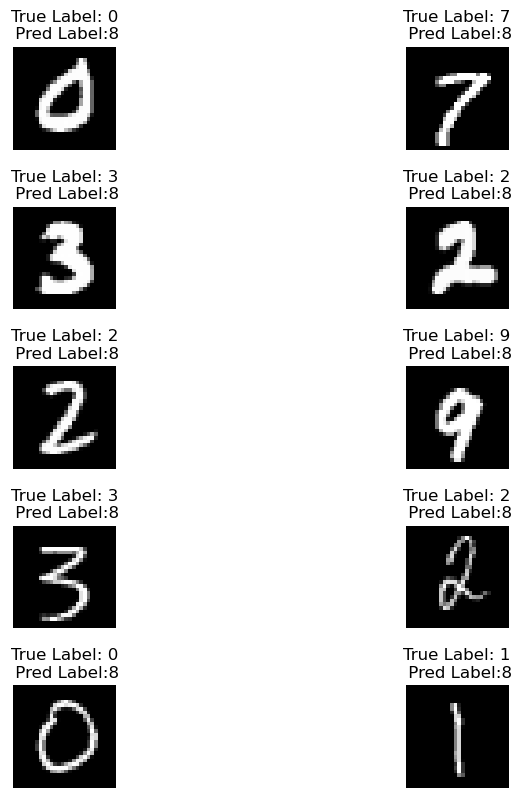

In [14]:
import numpy as np
fig, axs = plt.subplots(5, 2, figsize=(8,8),squeeze=False )
fig.tight_layout(h_pad=2)
idx = 0
keys_list = iter(list(bn_misclassified_preds.keys()))
for i in range(5):
    for j in range(2):
        idx = next(keys_list)
        axs[i, j].imshow(np.transpose(bn_misclassified_preds[idx][0], (1,2,0)), cmap='gray')
        axs[i, j].axis('off')
        axs[i, j].set_title(f'True Label: {bn_misclassified_preds[idx][1]}\n Pred Label:{bn_misclassified_preds[idx][2].item()}')
        

In [15]:
model_ln = get_model("LN").to(device)
summary(model_ln, input_size=(1, 28, 28))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 16, 26, 26]             144
              ReLU-2           [-1, 16, 26, 26]               0
         LayerNorm-3           [-1, 16, 26, 26]          21,632
           Dropout-4           [-1, 16, 26, 26]               0
            Conv2d-5           [-1, 16, 24, 24]           2,304
              ReLU-6           [-1, 16, 24, 24]               0
         LayerNorm-7           [-1, 16, 24, 24]          18,432
           Dropout-8           [-1, 16, 24, 24]               0
            Conv2d-9           [-1, 10, 24, 24]             160
        MaxPool2d-10           [-1, 10, 12, 12]               0
           Conv2d-11           [-1, 16, 10, 10]           1,440
             ReLU-12           [-1, 16, 10, 10]               0
        LayerNorm-13           [-1, 16, 10, 10]           3,200
          Dropout-14           [-1, 16,

In [16]:
ln_trainer = Trainer(model_ln)

In [11]:
from torch.optim.lr_scheduler import StepLR, LambdaLR

optimizer2 = optim.SGD(model_ln.parameters(), lr=0.01, momentum=0.9)
# scheduler = StepLR(optimizer, step_size=4, gamma=0.1)
scheduler2 = torch.optim.lr_scheduler.MultiStepLR(optimizer2, milestones=[6,8,9], gamma=0.1)

EPOCHS = 20
for epoch in range(EPOCHS):
    print("EPOCH:", epoch)
    ln_trainer.train(device, train_loader, optimizer2, epoch)
    ln_trainer.test(device, test_loader)

EPOCH: 0


Loss=0.3170081675052643 Batch_id=468 Accuracy=80.15: 100%|███████████████████████████| 469/469 [00:08<00:00, 53.25it/s]



Test set: Average loss: 0.1483, Accuracy: 9731/10000 (97.31%)

EPOCH: 1


Loss=0.05866584554314613 Batch_id=468 Accuracy=96.45: 100%|██████████████████████████| 469/469 [00:06<00:00, 76.61it/s]



Test set: Average loss: 0.0891, Accuracy: 9783/10000 (97.83%)

EPOCH: 2


Loss=0.10012143105268478 Batch_id=468 Accuracy=97.42: 100%|██████████████████████████| 469/469 [00:06<00:00, 73.79it/s]



Test set: Average loss: 0.0598, Accuracy: 9839/10000 (98.39%)

EPOCH: 3


Loss=0.18317155539989471 Batch_id=468 Accuracy=97.80: 100%|██████████████████████████| 469/469 [00:06<00:00, 77.20it/s]



Test set: Average loss: 0.0443, Accuracy: 9887/10000 (98.87%)

EPOCH: 4


Loss=0.03692584112286568 Batch_id=468 Accuracy=98.03: 100%|██████████████████████████| 469/469 [00:06<00:00, 74.97it/s]



Test set: Average loss: 0.0375, Accuracy: 9905/10000 (99.05%)

EPOCH: 5


Loss=0.019735585898160934 Batch_id=468 Accuracy=98.25: 100%|█████████████████████████| 469/469 [00:06<00:00, 76.44it/s]



Test set: Average loss: 0.0396, Accuracy: 9899/10000 (98.99%)

EPOCH: 6


Loss=0.02190476469695568 Batch_id=468 Accuracy=98.36: 100%|██████████████████████████| 469/469 [00:06<00:00, 75.65it/s]



Test set: Average loss: 0.0340, Accuracy: 9907/10000 (99.07%)

EPOCH: 7


Loss=0.030349595472216606 Batch_id=468 Accuracy=98.51: 100%|█████████████████████████| 469/469 [00:07<00:00, 66.01it/s]



Test set: Average loss: 0.0382, Accuracy: 9897/10000 (98.97%)

EPOCH: 8


Loss=0.06483634561300278 Batch_id=468 Accuracy=98.50: 100%|██████████████████████████| 469/469 [00:06<00:00, 69.97it/s]



Test set: Average loss: 0.0299, Accuracy: 9918/10000 (99.18%)

EPOCH: 9


Loss=0.05503762885928154 Batch_id=468 Accuracy=98.62: 100%|██████████████████████████| 469/469 [00:06<00:00, 76.25it/s]



Test set: Average loss: 0.0319, Accuracy: 9917/10000 (99.17%)

EPOCH: 10


Loss=0.02358214743435383 Batch_id=468 Accuracy=98.75: 100%|██████████████████████████| 469/469 [00:06<00:00, 75.12it/s]



Test set: Average loss: 0.0254, Accuracy: 9928/10000 (99.28%)

EPOCH: 11


Loss=0.056017909198999405 Batch_id=468 Accuracy=98.68: 100%|█████████████████████████| 469/469 [00:06<00:00, 71.85it/s]



Test set: Average loss: 0.0227, Accuracy: 9937/10000 (99.37%)

EPOCH: 12


Loss=0.01376273948699236 Batch_id=468 Accuracy=98.80: 100%|██████████████████████████| 469/469 [00:06<00:00, 75.05it/s]



Test set: Average loss: 0.0258, Accuracy: 9922/10000 (99.22%)

EPOCH: 13


Loss=0.04237252101302147 Batch_id=468 Accuracy=98.83: 100%|██████████████████████████| 469/469 [00:06<00:00, 71.22it/s]



Test set: Average loss: 0.0237, Accuracy: 9933/10000 (99.33%)

EPOCH: 14


Loss=0.008418623358011246 Batch_id=468 Accuracy=98.83: 100%|█████████████████████████| 469/469 [00:07<00:00, 66.44it/s]



Test set: Average loss: 0.0254, Accuracy: 9924/10000 (99.24%)

EPOCH: 15


Loss=0.028092460706830025 Batch_id=468 Accuracy=98.81: 100%|█████████████████████████| 469/469 [00:06<00:00, 68.23it/s]



Test set: Average loss: 0.0242, Accuracy: 9926/10000 (99.26%)

EPOCH: 16


Loss=0.09527838975191116 Batch_id=468 Accuracy=98.94: 100%|██████████████████████████| 469/469 [00:06<00:00, 71.09it/s]



Test set: Average loss: 0.0290, Accuracy: 9909/10000 (99.09%)

EPOCH: 17


Loss=0.009046540595591068 Batch_id=468 Accuracy=98.89: 100%|█████████████████████████| 469/469 [00:06<00:00, 71.73it/s]



Test set: Average loss: 0.0207, Accuracy: 9938/10000 (99.38%)

EPOCH: 18


Loss=0.04591794312000275 Batch_id=468 Accuracy=98.97: 100%|██████████████████████████| 469/469 [00:07<00:00, 66.18it/s]



Test set: Average loss: 0.0319, Accuracy: 9908/10000 (99.08%)

EPOCH: 19


Loss=0.00695231044664979 Batch_id=468 Accuracy=98.93: 100%|██████████████████████████| 469/469 [00:06<00:00, 76.32it/s]



Test set: Average loss: 0.0230, Accuracy: 9929/10000 (99.29%)



In [17]:
ln_train_losses, ln_train_acc, ln_test_losses, ln_test_acc = ln_trainer.get_stats()

In [17]:
ln_misclassified_preds = get_misclassified_images(model_ln, device, test_loader)

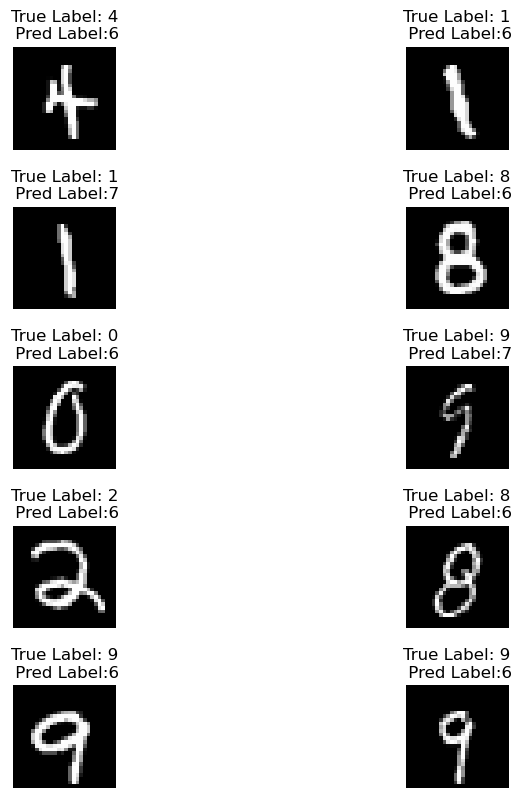

In [23]:
import numpy as np
fig, axs = plt.subplots(5, 2, figsize=(8,8),squeeze=False )
fig.tight_layout(h_pad=2)
keys_list = iter(list(ln_misclassified_preds.keys()))
for i in range(5):
    for j in range(2):
        idx = next(keys_list)
        axs[i, j].imshow(np.transpose(ln_misclassified_preds[idx][0], (1,2,0)), cmap='gray')
        axs[i, j].axis('off')
        axs[i, j].set_title(f'True Label: {ln_misclassified_preds[idx][1]}\n Pred Label:{ln_misclassified_preds[idx][2].item()}')
        

In [24]:
model_gn = get_model("GN").to(device)
summary(model_gn, input_size=(1, 28, 28))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 16, 26, 26]             144
              ReLU-2           [-1, 16, 26, 26]               0
         GroupNorm-3           [-1, 16, 26, 26]              32
           Dropout-4           [-1, 16, 26, 26]               0
            Conv2d-5           [-1, 16, 24, 24]           2,304
              ReLU-6           [-1, 16, 24, 24]               0
         GroupNorm-7           [-1, 16, 24, 24]              32
           Dropout-8           [-1, 16, 24, 24]               0
            Conv2d-9           [-1, 10, 24, 24]             160
        MaxPool2d-10           [-1, 10, 12, 12]               0
           Conv2d-11           [-1, 16, 10, 10]           1,440
             ReLU-12           [-1, 16, 10, 10]               0
        GroupNorm-13           [-1, 16, 10, 10]              32
          Dropout-14           [-1, 16,

In [25]:
gn_trainer = Trainer(model_gn)

In [15]:
from torch.optim.lr_scheduler import StepLR, LambdaLR

optimizer = optim.SGD(model_gn.parameters(), lr=0.01, momentum=0.9)
# scheduler = StepLR(optimizer, step_size=4, gamma=0.1)
scheduler = torch.optim.lr_scheduler.MultiStepLR(optimizer, milestones=[6,8,9], gamma=0.1)

EPOCHS = 20
for epoch in range(EPOCHS):
    print("EPOCH:", epoch)
    gn_trainer.train(device, train_loader, optimizer, epoch)
    gn_trainer.test(device, test_loader)

EPOCH: 0


Loss=0.16735941171646118 Batch_id=468 Accuracy=80.38: 100%|██████████████████████████| 469/469 [00:06<00:00, 71.81it/s]



Test set: Average loss: 0.1108, Accuracy: 9720/10000 (97.20%)

EPOCH: 1


Loss=0.0359715037047863 Batch_id=468 Accuracy=96.47: 100%|███████████████████████████| 469/469 [00:06<00:00, 68.50it/s]



Test set: Average loss: 0.0613, Accuracy: 9835/10000 (98.35%)

EPOCH: 2


Loss=0.046922337263822556 Batch_id=468 Accuracy=97.37: 100%|█████████████████████████| 469/469 [00:06<00:00, 73.47it/s]



Test set: Average loss: 0.0439, Accuracy: 9885/10000 (98.85%)

EPOCH: 3


Loss=0.04759221896529198 Batch_id=468 Accuracy=97.87: 100%|██████████████████████████| 469/469 [00:06<00:00, 70.65it/s]



Test set: Average loss: 0.0459, Accuracy: 9873/10000 (98.73%)

EPOCH: 4


Loss=0.12874376773834229 Batch_id=468 Accuracy=98.19: 100%|██████████████████████████| 469/469 [00:06<00:00, 71.91it/s]



Test set: Average loss: 0.0371, Accuracy: 9897/10000 (98.97%)

EPOCH: 5


Loss=0.0779808983206749 Batch_id=468 Accuracy=98.19: 100%|███████████████████████████| 469/469 [00:06<00:00, 71.63it/s]



Test set: Average loss: 0.0326, Accuracy: 9901/10000 (99.01%)

EPOCH: 6


Loss=0.014000735245645046 Batch_id=468 Accuracy=98.32: 100%|█████████████████████████| 469/469 [00:06<00:00, 67.00it/s]



Test set: Average loss: 0.0382, Accuracy: 9892/10000 (98.92%)

EPOCH: 7


Loss=0.04973709210753441 Batch_id=468 Accuracy=98.44: 100%|██████████████████████████| 469/469 [00:06<00:00, 71.76it/s]



Test set: Average loss: 0.0364, Accuracy: 9896/10000 (98.96%)

EPOCH: 8


Loss=0.07125157117843628 Batch_id=468 Accuracy=98.56: 100%|██████████████████████████| 469/469 [00:06<00:00, 72.23it/s]



Test set: Average loss: 0.0402, Accuracy: 9874/10000 (98.74%)

EPOCH: 9


Loss=0.021835075691342354 Batch_id=468 Accuracy=98.61: 100%|█████████████████████████| 469/469 [00:06<00:00, 73.34it/s]



Test set: Average loss: 0.0298, Accuracy: 9904/10000 (99.04%)

EPOCH: 10


Loss=0.007484273985028267 Batch_id=468 Accuracy=98.66: 100%|█████████████████████████| 469/469 [00:06<00:00, 73.14it/s]



Test set: Average loss: 0.0276, Accuracy: 9914/10000 (99.14%)

EPOCH: 11


Loss=0.010164108127355576 Batch_id=468 Accuracy=98.70: 100%|█████████████████████████| 469/469 [00:06<00:00, 72.48it/s]



Test set: Average loss: 0.0334, Accuracy: 9900/10000 (99.00%)

EPOCH: 12


Loss=0.028820812702178955 Batch_id=468 Accuracy=98.68: 100%|█████████████████████████| 469/469 [00:06<00:00, 69.48it/s]



Test set: Average loss: 0.0343, Accuracy: 9898/10000 (98.98%)

EPOCH: 13


Loss=0.009079201146960258 Batch_id=468 Accuracy=98.86: 100%|█████████████████████████| 469/469 [00:06<00:00, 74.31it/s]



Test set: Average loss: 0.0271, Accuracy: 9915/10000 (99.15%)

EPOCH: 14


Loss=0.06863706558942795 Batch_id=468 Accuracy=98.81: 100%|██████████████████████████| 469/469 [00:06<00:00, 71.91it/s]



Test set: Average loss: 0.0234, Accuracy: 9921/10000 (99.21%)

EPOCH: 15


Loss=0.03052961640059948 Batch_id=468 Accuracy=98.86: 100%|██████████████████████████| 469/469 [00:06<00:00, 72.43it/s]



Test set: Average loss: 0.0275, Accuracy: 9913/10000 (99.13%)

EPOCH: 16


Loss=0.008419452235102654 Batch_id=468 Accuracy=98.89: 100%|█████████████████████████| 469/469 [00:06<00:00, 74.64it/s]



Test set: Average loss: 0.0251, Accuracy: 9921/10000 (99.21%)

EPOCH: 17


Loss=0.09670418500900269 Batch_id=468 Accuracy=98.89: 100%|██████████████████████████| 469/469 [00:06<00:00, 68.90it/s]



Test set: Average loss: 0.0247, Accuracy: 9918/10000 (99.18%)

EPOCH: 18


Loss=0.05733555182814598 Batch_id=468 Accuracy=98.95: 100%|██████████████████████████| 469/469 [00:07<00:00, 66.38it/s]



Test set: Average loss: 0.0233, Accuracy: 9933/10000 (99.33%)

EPOCH: 19


Loss=0.005201118998229504 Batch_id=468 Accuracy=98.90: 100%|█████████████████████████| 469/469 [00:06<00:00, 71.82it/s]



Test set: Average loss: 0.0233, Accuracy: 9928/10000 (99.28%)



In [16]:
gn_train_losses, gn_train_acc, gn_test_losses, gn_test_acc = gn_trainer.get_stats()

In [28]:
gn_misclassified_preds = get_misclassified_images(model_gn, device, test_loader)

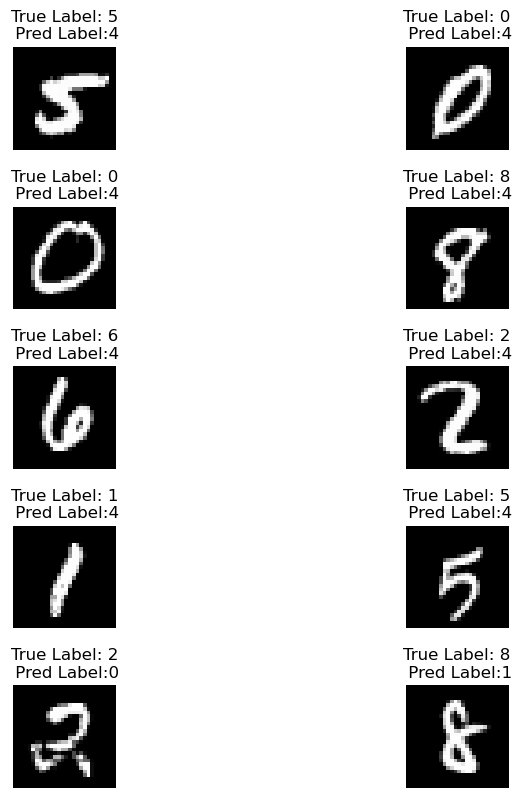

In [30]:
import numpy as np
fig, axs = plt.subplots(5, 2, figsize=(8,8),squeeze=False )
fig.tight_layout(h_pad=2)
keys_list = iter(list(gn_misclassified_preds.keys()))
for i in range(5):
    for j in range(2):
        idx = next(keys_list)
        axs[i, j].imshow(np.transpose(gn_misclassified_preds[idx][0], (1,2,0)), cmap='gray')
        axs[i, j].axis('off')
        axs[i, j].set_title(f'True Label: {gn_misclassified_preds[idx][1]}\n Pred Label:{gn_misclassified_preds[idx][2].item()}')
        

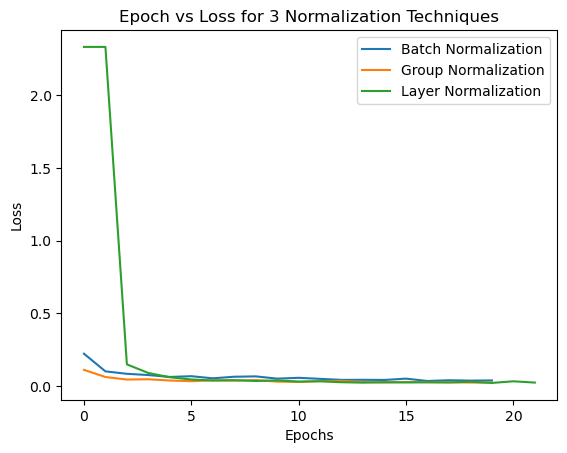

In [33]:
plt.plot(bn_test_losses, label="Batch Normalization")
plt.plot(gn_test_losses, label="Group Normalization")
plt.plot(ln_test_losses, label="Layer Normalization")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title("Epoch vs Loss for 3 Normalization Techniques")
plt.legend()

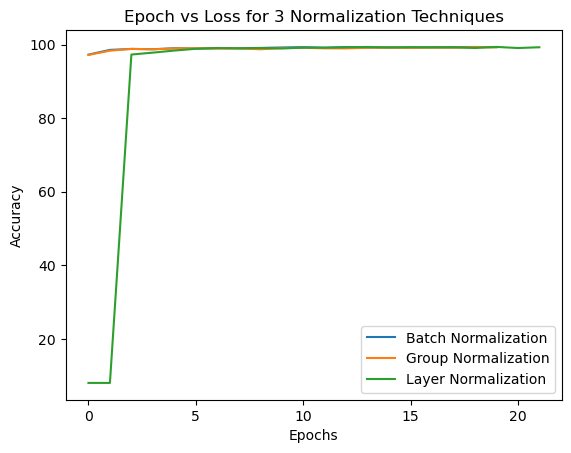

In [34]:
plt.plot(bn_test_acc, label="Batch Normalization")
plt.plot(gn_test_acc, label="Group Normalization")
plt.plot(ln_test_acc, label="Layer Normalization")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title("Epoch vs Loss for 3 Normalization Techniques")
plt.legend()